# In this notebook we visualize effects of inserting a single CTCF in multiple backgrounds

In [1]:
import bioframe
import pandas as pd
import numpy as np
import tensorflow as tf
from basenji import dna_io
import akita_utils
from akita_utils.format_io import h5_to_df, multi_h5_to_df, calculate_mean_stats_across_models, calculate_mean_stats_across_targets
from akita_utils.tsv_gen_utils import filter_boundary_ctcfs_from_h5, generate_ctcf_motifs_df
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import h5py

# Importing scores from simulations

In [25]:
def remove_duplicate_columns(df):
    # Transpose the DataFrame
    transposed_df = df.T

    # Drop duplicates from the transposed DataFrame
    deduplicated_df = transposed_df.drop_duplicates()

    # Transpose the deduplicated DataFrame back to the original orientation
    result_df = deduplicated_df.T

    # Return the deduplicated DataFrame
    return result_df

# generate_locus_specification_list(dataframe=seq_coords_df, unique_identifier=unique_identifier)

In [6]:
h5_dirs = "/scratch1/kamulege/insert_experiments/11_uniformly_selcted_model6_motifs_v2/*/*/*.h5"
multi_model_df = multi_h5_to_df(h5_dirs)

multi_model_df_targets = calculate_mean_stats_across_targets(multi_model_df, models=[0,1,2,3,4,5,6,7], heads=[1], stats=["SCD", "SSD"])
multi_model_df_1 = calculate_mean_stats_across_models(multi_model_df_targets, heads=[1], stats=["SCD", "SSD"])

multi_model_df_1

No data for SCD_h1_m0 targets
No data for SSD_h1_m0 targets


,CTCF_1_genomic_SCD,CTCF_1_insert,SCD_h1_m3_t0,SCD_h1_m3_t1,SCD_h1_m3_t2,SCD_h1_m3_t3,SCD_h1_m3_t4,SCD_h1_m3_t5,SSD_h1_m3_t0,SSD_h1_m3_t1,...,SCD_h1_m4_targets_mean,SSD_h1_m4_targets_mean,SCD_h1_m5_targets_mean,SSD_h1_m5_targets_mean,SCD_h1_m6_targets_mean,SSD_h1_m6_targets_mean,SCD_h1_m7_targets_mean,SSD_h1_m7_targets_mean,SCD,SSD
0,61.880,"chr7,118307881,118307900,-,20,0,>",0.094299,0.102417,0.066345,0.062500,0.071960,0.059937,0.094299,0.102417,...,0.128296,0.128296,0.168945,0.168945,0.384521,0.384521,0.453857,0.453857,0.231812,0.231812
1,61.880,"chr7,118301143,118301162,-,20,0,>",0.854492,1.073242,0.616211,0.586426,0.731445,0.582520,0.854492,1.073242,...,1.000977,1.000977,2.080078,2.080078,1.366211,1.366211,4.550781,4.550781,2.087891,2.087891
2,61.800,"chr7,118301288,118301307,+,20,0,>",0.060364,0.062073,0.046997,0.043823,0.046265,0.040039,0.060364,0.062073,...,0.087219,0.087219,0.084045,0.084045,0.303955,0.303955,0.198608,0.198608,0.141113,0.141113
3,61.720,"chr7,118302080,118302099,+,20,0,>",0.101257,0.124939,0.094849,0.090820,0.095642,0.082764,0.101257,0.124939,...,0.096619,0.096619,0.109131,0.109131,0.233032,0.233032,0.318604,0.318604,0.189819,0.189819
4,54.300,"chr1,5905663,5905682,-,20,0,>",0.041718,0.052338,0.039520,0.037079,0.040619,0.033539,0.041718,0.052338,...,0.066101,0.066101,0.054901,0.054901,0.191772,0.191772,0.835449,0.835449,0.227661,0.227661
5,54.250,"chr1,5905410,5905429,+,20,0,>",0.114014,0.142700,0.101990,0.096680,0.106689,0.087830,0.114014,0.142700,...,0.055756,0.055756,0.110535,0.110535,0.157593,0.157593,0.135132,0.135132,0.126587,0.126587
6,32.970,"chr12,80724993,80725012,-,20,0,>",33.750000,43.500000,25.359375,24.828125,31.359375,24.328125,33.750000,43.500000,...,28.625000,28.625000,41.500000,41.500000,31.875000,31.875000,30.437500,30.437500,31.828125,31.828125
7,32.900,"chr12,80722104,80722123,-,20,0,>",0.132935,0.139893,0.139160,0.129883,0.126831,0.111389,0.132935,0.139893,...,0.079102,0.079102,0.137085,0.137085,0.205078,0.205078,0.230469,0.230469,0.162964,0.162964
8,32.900,"chr12,80721634,80721653,-,20,0,>",0.589844,0.719727,0.451172,0.422852,0.506348,0.407471,0.589844,0.719727,...,0.460205,0.460205,0.808594,0.808594,0.420654,0.420654,1.855469,1.855469,0.808594,0.808594
9,32.880,"chr12,80729003,80729022,+,20,0,>",7.433594,9.156250,3.611328,3.521484,5.414062,4.214844,7.433594,9.156250,...,4.207031,4.207031,3.119141,3.119141,8.273438,8.273438,5.511719,5.511719,5.136719,5.136719


In [32]:
uniformly_selcted_model2_motifs_h5_dirs = "/scratch1/kamulege/insert_experiments/11_uniformly_selcted_model6_motifs_v2/*/*/*.h5"
uniformly_selcted_model2_motifs_df = multi_h5_to_df(uniformly_selcted_model2_motifs_h5_dirs)
uniformly_selcted_model2_motifs_df = calculate_mean_stats_across_targets(uniformly_selcted_model2_motifs_df, models=[0,1,2,3,4,5,6,7], heads=[1], stats=["SCD", "SSD"])
uniformly_selcted_model2_motifs_df = calculate_mean_stats_across_models(uniformly_selcted_model2_motifs_df, heads=[1], stats=["SCD", "SSD"])


model0_strong_30_h5_dirs = (
    "/scratch1/kamulege/insert_experiments/model0_strong_30/*/*/*.h5"
)
model0_strong_30_motifs_df = multi_h5_to_df(model0_strong_30_h5_dirs)
model0_strong_30_motifs_df = calculate_mean_stats_across_targets(model0_strong_30_motifs_df, models=[0,1,2,3,4,5,6,7], heads=[1], stats=["SCD", "SSD"])
model0_strong_30_motifs_df = calculate_mean_stats_across_models(model0_strong_30_motifs_df, heads=[1], stats=["SCD", "SSD"])


model0_uniform_100_h5_dirs = (
    "/scratch1/kamulege/insert_experiments/model0_uniform_100/*/*/*.h5"
)
model0_uniform_100_motifs_df = multi_h5_to_df(model0_uniform_100_h5_dirs)
model0_uniform_100_motifs_df = calculate_mean_stats_across_targets(model0_uniform_100_motifs_df, models=[0,1,2,3,4,5,6,7], heads=[1], stats=["SCD", "SSD"])
model0_uniform_100_motifs_df = calculate_mean_stats_across_models(model0_uniform_100_motifs_df, heads=[1], stats=["SCD", "SSD"])


No data for SCD_h1_m0 targets
No data for SSD_h1_m0 targets


In [44]:
# motifs_df = model0_strong_30_motifs_df
motifs_df = model0_uniform_100_motifs_df

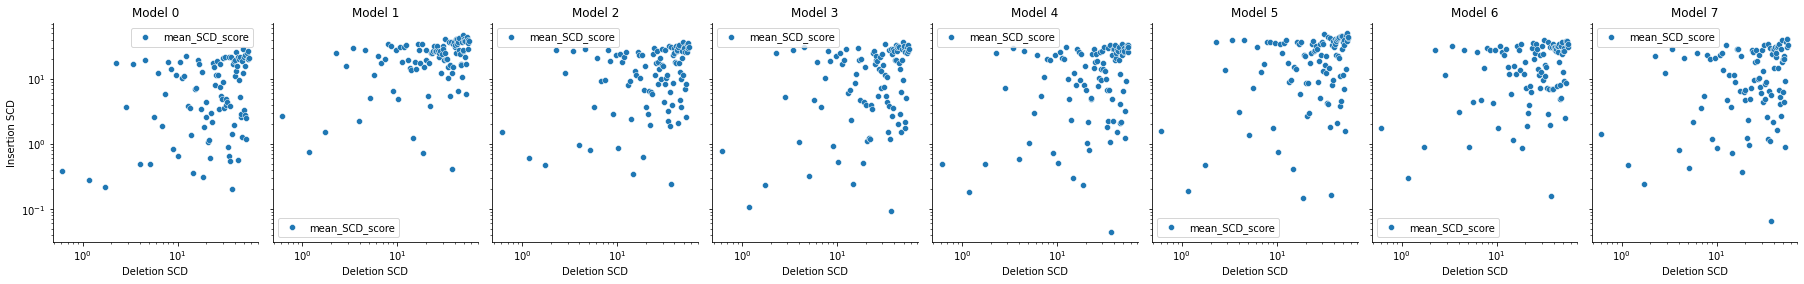

In [45]:
data = remove_duplicate_columns(motifs_df)

# Create the plot
fig, axes = plt.subplots(nrows=1, ncols=8, figsize=(25, 4), sharey=True)

for model, ax in enumerate(axes):
    sns.scatterplot(
        data=data,
        ax=ax,
        x="CTCF_1_genomic_SCD",
        y=f"SCD_h1_m{model}_targets_mean", 
        label="mean_SCD_score",
    )
    sns.despine(top=True, right=True)
    ax.set_title(f"Model {model}")
    ax.set_xlabel("Deletion SCD")
    ax.set_ylabel("Insertion SCD")
    ax.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Set axes to use log scale
for ax in axes:
    ax.set_xscale("log")
    ax.set_yscale("log")

# Display the plot
plt.show()

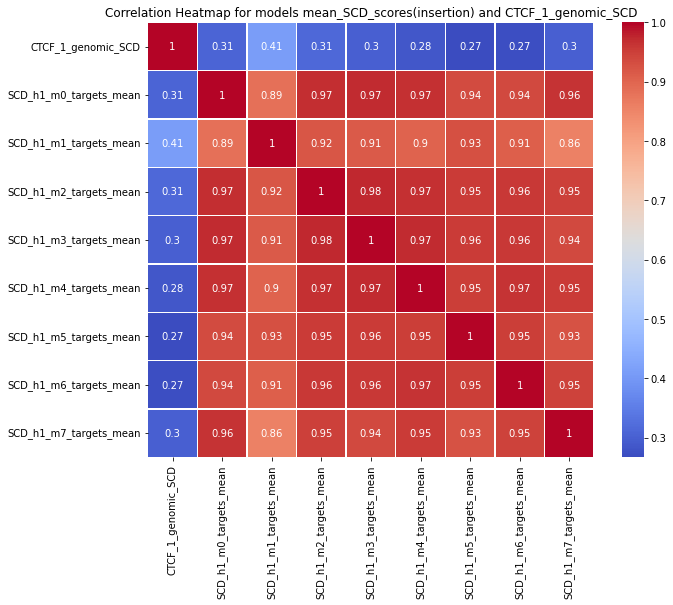

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

data = remove_duplicate_columns(motifs_df)


# Filter columns that contain "mean_SCD_score" and "CTCF_1_genomic_SCD" in their names
columns_of_interest = [
    col
    for col in data.columns
    if "target" in col or col == "CTCF_1_genomic_SCD"
]

# print(columns_of_interest)
data_selected = data[columns_of_interest]

# Calculate correlation matrix
correlation_matrix = data_selected.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap for models mean_SCD_scores(insertion) and CTCF_1_genomic_SCD")
plt.show()

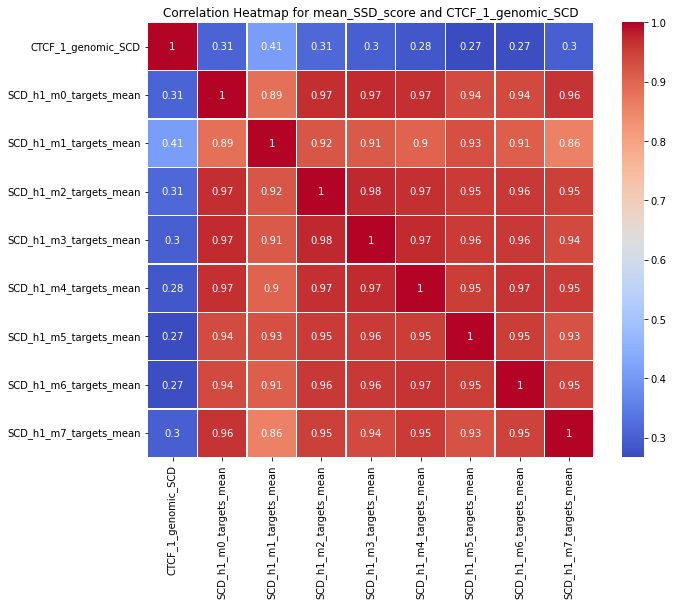

In [50]:
data = remove_duplicate_columns(motifs_df)

# Filter columns that contain "mean_SCD_score" and "CTCF_1_genomic_SCD" in their names
columns_of_interest = [
    col
    for col in data.columns
    if "target" in col or col == "CTCF_1_genomic_SCD"
]
data_selected = data[columns_of_interest]

# Calculate correlation matrix
correlation_matrix = data_selected.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap for mean_SSD_score and CTCF_1_genomic_SCD")
plt.show()

In [ ]:
def collect_h5(file_name, out_dir, num_procs):
    # count variants
    num_variants = 0
    for pi in range(num_procs):
        # open job
        job_h5_file = "%s/job%d/%s" % (out_dir, pi, file_name)
        job_h5_open = h5py.File(job_h5_file, "r")
        # print(job_h5_open)
        num_variants += len(job_h5_open["chrom"])  # chrom_core
        job_h5_open.close()

    # initialize final h5
    final_h5_file = "%s/%s" % (out_dir, file_name)
    final_h5_open = h5py.File(final_h5_file, "w")

    # keep dict for string values
    final_strings = {}

    job0_h5_file = "%s/job0/%s" % (out_dir, file_name)
    job0_h5_open = h5py.File(job0_h5_file, "r")
    for key in job0_h5_open.keys():
        if key in ["target_ids", "target_labels"]:
            # copy
            final_h5_open.create_dataset(key, data=job0_h5_open[key])

        elif job0_h5_open[key].dtype.char == "S":
            final_strings[key] = []

        elif job0_h5_open[key].ndim == 1:
            final_h5_open.create_dataset(
                key, shape=(num_variants,), dtype=job0_h5_open[key].dtype
            )

        else:
            num_targets = job0_h5_open[key].shape[1]
            final_h5_open.create_dataset(
                key, shape=(num_variants, num_targets), dtype=job0_h5_open[key].dtype
            )

    job0_h5_open.close()

    # set values
    vi = 0
    for pi in range(num_procs):
        # open job
        job_h5_file = "%s/job%d/%s" % (out_dir, pi, file_name)
        job_h5_open = h5py.File(job_h5_file, "r")

        # append to final
        for key in job_h5_open.keys():
            if key in ["target_ids", "target_labels"]:
                # once is enough
                pass

            else:
                if job_h5_open[key].dtype.char == "S":
                    final_strings[key] += list(job_h5_open[key])
                else:
                    job_variants = job_h5_open[key].shape[0]
                    final_h5_open[key][vi : vi + job_variants] = job_h5_open[key]

        vi += job_variants
        job_h5_open.close()

    # create final string datasets
    for key in final_strings:
        final_h5_open.create_dataset(key, data=np.array(final_strings[key], dtype="S"))

    final_h5_open.close()

In [ ]:
# collect_h5("scd.h5", "/scratch1/kamulege/disruption_genomic_scds/motif_expt_model7_head1", 10)